###### Importation

In [300]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###### GLOBAL VARIABLES

In [301]:
SEED = 8
OUT = 'co2'
OUTPUTS = ['co2','no','no2','pm10','pm2.5','humi','temp']
USE_FREQ = False
USE_SLIDING_WINDOW = False
USE_ROLLING_MEAN = False

###### DATA OPENING

In [302]:
data = pd.read_csv('all_data.csv')

In [303]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,1,11,14,3,4,7,8,9,a,b
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
1,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
2,495.0,45.0,68.0,45.0,117.0,36.0,auber,18.7,2013-01-12,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
3,708.0,45.3,90.0,40.0,234.0,73.0,auber,19.5,2013-01-09,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
4,749.0,41.8,213.0,62.0,314.0,112.0,auber,17.5,2013-01-16,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0


###### Missing data

In [304]:
for col in data.columns:
    print("missing data in {} : {} i.e. {}%".format(col,len(data[data[col].isnull()]),
                                                       len(data[data[col].isnull()])/float(len(data))*100))

missing data in co2 : 9585 i.e. 9.11841091355%
missing data in humi : 4409 i.e. 4.19437388814%
missing data in no : 20924 i.e. 19.9054387016%
missing data in no2 : 12155 i.e. 11.5633056499%
missing data in pm10 : 7853 i.e. 7.47072309902%
missing data in pm2.5 : 73562 i.e. 69.9810687139%
missing data in station : 0 i.e. 0.0%
missing data in temp : 4424 i.e. 4.20864370178%
missing data in date : 0 i.e. 0.0%
missing data in time : 0 i.e. 0.0%
missing data in precipitation : 144 i.e. 0.136990210908%
missing data in temp_min : 144 i.e. 0.136990210908%
missing data in temp_max : 144 i.e. 0.136990210908%
missing data in holiday : 0 i.e. 0.0%
missing data in celebration : 0 i.e. 0.0%
missing data in 1 : 0 i.e. 0.0%
missing data in 11 : 0 i.e. 0.0%
missing data in 14 : 0 i.e. 0.0%
missing data in 3 : 0 i.e. 0.0%
missing data in 4 : 0 i.e. 0.0%
missing data in 7 : 0 i.e. 0.0%
missing data in 8 : 0 i.e. 0.0%
missing data in 9 : 0 i.e. 0.0%
missing data in a : 0 i.e. 0.0%
missing data in b : 0 i.e

Top three missing data columns :  
-no  
-pm10  
-pm2.5  
-co2

#### Date & Time processing

In [305]:
data['datetime'] = data['date'].str.cat(data['time'].astype(str), sep = ' ')

In [306]:
data['datetime'] = pd.to_datetime(data['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [307]:
data['year'],data['month'],data['day'] = data["date"].str.split("-").str
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [308]:
data['hour'],data['minute'],data['second'] = data["time"].str.split(":").str
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)
data['second'] = data['second'].astype(int)

In [309]:
data = data.drop(labels = ['minute','second'], axis = 1)

In [310]:
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")

In [311]:
data['week'] = data['date'].dt.week

In [312]:
data['weekday'] = data['date'].dt.dayofweek

In [313]:
data['time'] = pd.to_datetime(data['time'], format = "%H:%M:%S")

In [314]:
data['time'] = data["time"].dt.time

###### Missing data in meteo

There are a couple of missing days in the meteo columns, I propose to take the mean of the previous and past days.

In [315]:
data[data['precipitation'].isnull()]

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,datetime,year,month,day,hour,week,weekday
1260,446.0,43.2,34.0,73.0,32.0,14.0,auber,17.3,2016-04-30,10:00:00,...,402.0,95.0,0.0,2016-04-30 10:00:00,2016,4,30,10,17,5
1413,609.0,41.8,162.0,88.0,143.0,50.0,auber,25.6,2016-08-31,10:00:00,...,402.0,95.0,0.0,2016-08-31 10:00:00,2016,8,31,10,35,2
2777,477.0,41.6,33.0,67.0,35.0,16.0,auber,17.7,2016-04-30,13:00:00,...,390.0,94.0,0.0,2016-04-30 13:00:00,2016,4,30,13,17,5
2871,486.0,37.2,33.0,92.0,74.0,24.0,auber,25.8,2016-08-31,13:00:00,...,390.0,94.0,0.0,2016-08-31 13:00:00,2016,8,31,13,35,2
4138,526.0,34.3,23.0,102.0,85.0,28.0,auber,26.5,2016-08-31,17:00:00,...,630.0,135.0,0.0,2016-08-31 17:00:00,2016,8,31,17,35,2
4283,530.0,39.4,45.0,81.0,34.0,17.0,auber,17.9,2016-04-30,17:00:00,...,630.0,135.0,0.0,2016-04-30 17:00:00,2016,4,30,17,17,5
5486,507.0,35.0,25.0,106.0,76.0,26.0,auber,26.2,2016-08-31,16:00:00,...,545.0,103.0,0.0,2016-08-31 16:00:00,2016,8,31,16,35,2
5709,506.0,41.5,41.0,78.0,47.0,23.0,auber,17.8,2016-04-30,16:00:00,...,545.0,103.0,0.0,2016-04-30 16:00:00,2016,4,30,16,17,5
7208,404.0,45.3,16.0,59.0,14.0,7.0,auber,17.6,2016-04-30,03:00:00,...,19.0,0.0,0.0,2016-04-30 03:00:00,2016,4,30,3,17,5
7242,409.0,40.2,58.0,84.0,121.0,38.0,auber,25.7,2016-08-31,03:00:00,...,19.0,0.0,0.0,2016-08-31 03:00:00,2016,8,31,3,35,2


In [316]:
for idx in data[data['temp_min'].isnull()].index:
    data.loc[idx,'temp_min'] = (data.loc[idx-1,'temp_min'] + data.loc[idx+1,'temp_min'])/2
for idx in data[data['temp_max'].isnull()].index:
    data.loc[idx,'temp_max'] = (data.loc[idx-1,'temp_max'] + data.loc[idx+1,'temp_max'])/2
for idx in data[data['precipitation'].isnull()].index:
    data.loc[idx,'precipitation'] = (data.loc[idx-1,'precipitation'] + data.loc[idx+1,'precipitation'])/2
for idx in data[data['precipitation'].isnull()].index:
    data.loc[idx,'precipitation'] = (data.loc[idx-1,'precipitation'] + data.loc[idx+1,'precipitation'])/2

###### Missing data in CO2

Let's choose auber because, it is the station with the least missing data


In [317]:
data = data.drop(labels=[x for x in OUTPUTS if x != OUT], axis = 1)

In [318]:
data = data.dropna()

In [319]:
data = data[data['station'] == 'auber']

###### Frequentation
Frequentation is the sum of the trains per hour over all lines

In [320]:
data['frequentation'] = data['a']+data['b']+data['1']+data['11']+data['14']+data['3']+data['4']+data['7']+data['9']

###### Celebration & holidays impact

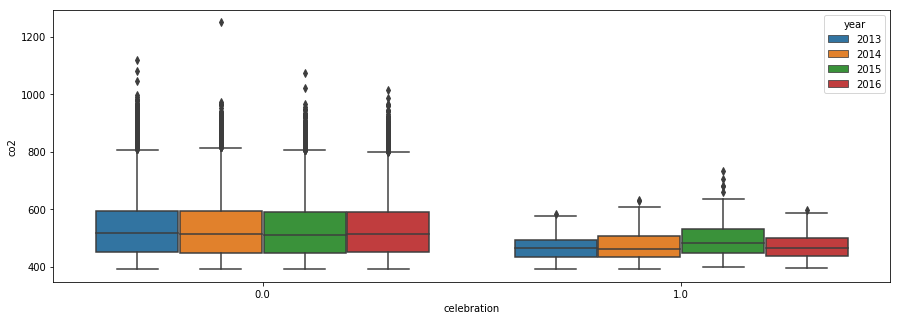

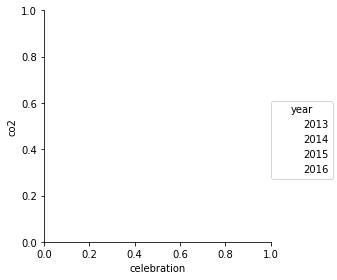

In [321]:
fig, ax = plt.subplots(figsize=(15,5))
sns.factorplot(x="celebration", y=OUT, hue = "year", data=data, kind = "box", ax = ax)

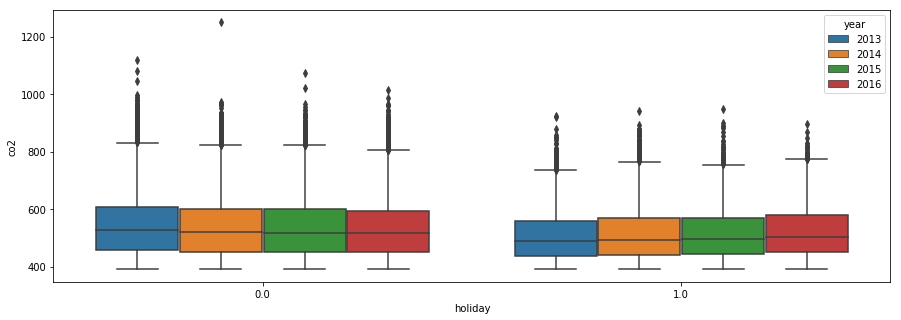

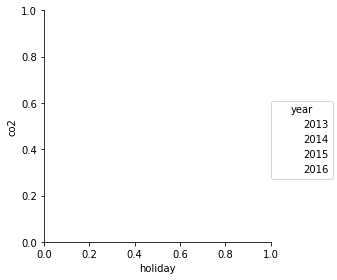

In [322]:
fig, ax = plt.subplots(figsize=(15,5))
sns.factorplot(x="holiday", y=OUT, hue = "year", data=data, kind = "box", ax = ax)

###### Daily visualization

In [323]:
mask = (data['date'] > pd.datetime(2016,1,1)) & (data['date'] <= pd.datetime(2016,1,2))

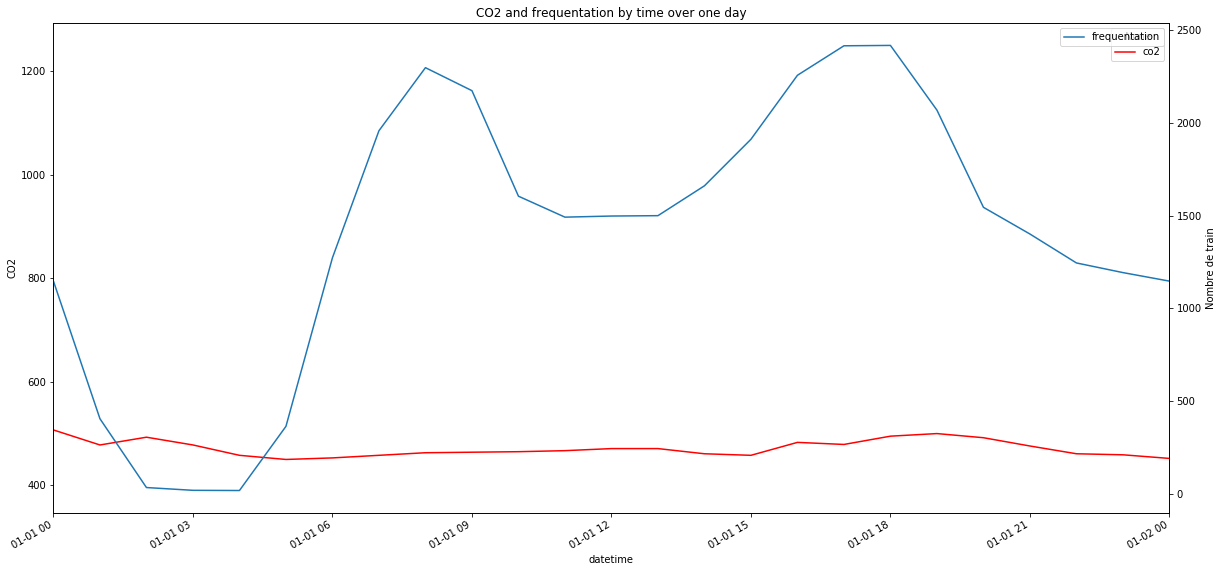

In [324]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlim([pd.datetime(2016,1,1,0),pd.datetime(2016,1,2,0)])
ax1.set_title("CO2 and frequentation by time over one day")
ax1.set_xlabel("Day and Hour")
ax2 = ax1.twinx()
ax1.set_ylabel("CO2")
ax2.set_ylabel("Nombre de train")

ax1.legend(loc=0)
data.plot(x = ['datetime'],y = [OUT], ax = ax1, label = "co2", color = 'red')
data.plot(x = ['datetime'],y = ['frequentation'], ax = ax2, label = "frequentation")

###### Time delay
Adding a time to take in account the forecasting aspect. For visibility purpose, I will focus on year 2013 on January

In [325]:
delay = 24
data[OUT + '_delay'] = data[OUT]
data[OUT + '_delay'] = data[OUT + '_delay'].shift(delay)

In [326]:
data_2013 = data[(data['year'] == 2013) & (data['month'] == 1)]

###### Delayed rolling mean

In [327]:
print(data_2013.columns)
data_2013 = data_2013.set_index(data_2013['datetime'])
data_2013 = data_2013.sort_index()
data_2013[OUT + '_2h'] = data_2013[OUT].rolling(window = '2H',min_periods = 1).mean()
data_2013[OUT + '_3h'] = data_2013[OUT].rolling(window = '3H',min_periods = 1).mean()
data_2013[OUT + '_d'] = data_2013[OUT].rolling(window = '24H',min_periods = 1).mean()
data_2013[OUT + '_w'] = data_2013[OUT].rolling(window = '7d',min_periods = 1).mean()

Index([u'co2', u'station', u'date', u'time', u'precipitation', u'temp_min',
       u'temp_max', u'holiday', u'celebration', u'1', u'11', u'14', u'3', u'4',
       u'7', u'8', u'9', u'a', u'b', u'datetime', u'year', u'month', u'day',
       u'hour', u'week', u'weekday', u'frequentation', u'co2_delay'],
      dtype='object')


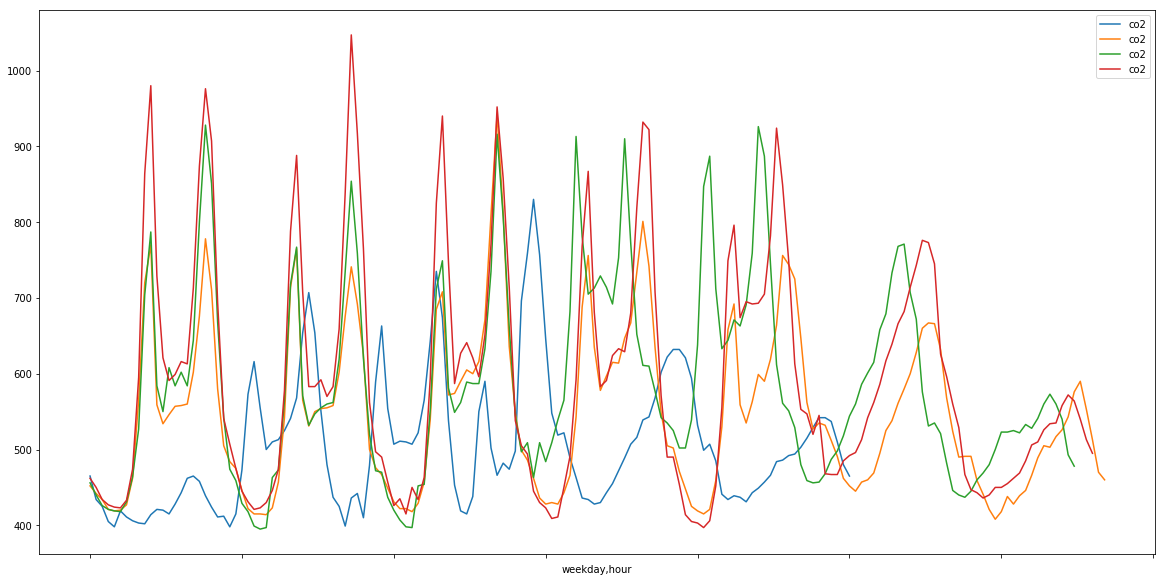

In [328]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Courbes sur différentes semaines du Co2 dans auber")
ax.set_xlabel("Jour de la semaine et heure")
ax.set_ylabel("Quantité de co2 en ppm")
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = OUT, ax = ax)
data_2013[data_2013["week"] == 2].plot(x = ['weekday','hour'],y = OUT, ax = ax)
data_2013[data_2013["week"] == 3].plot(x = ['weekday','hour'],y = OUT, ax = ax)
data_2013[data_2013["week"] == 4].plot(x = ['weekday','hour'],y = OUT, ax = ax)

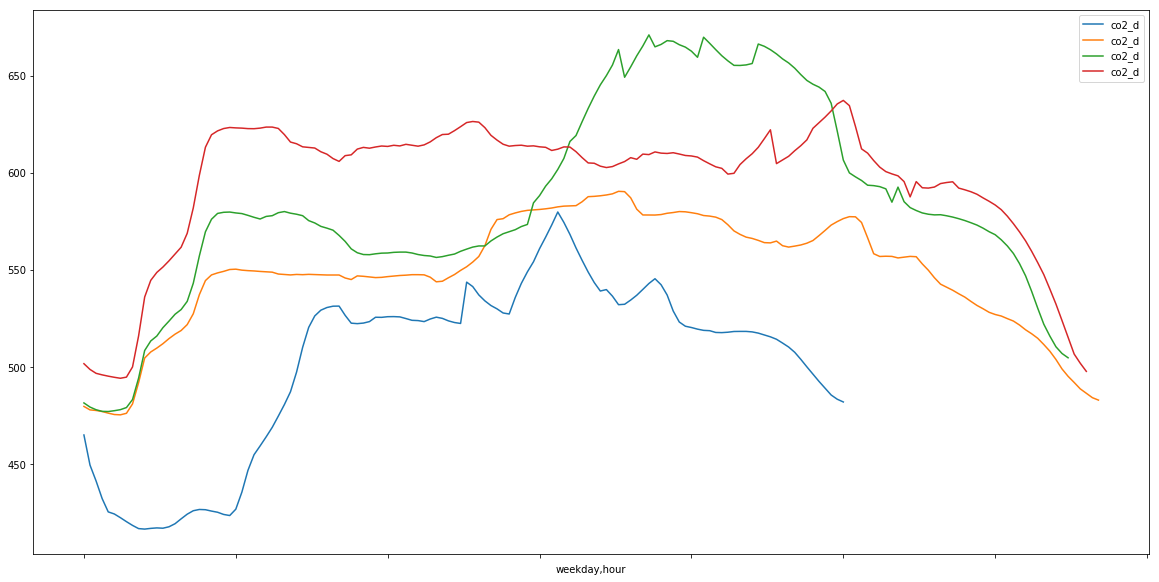

In [329]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Moyennes glissantes sur un jour sur différentes semaines du Co2 dans auber")
ax.set_xlabel("Jour de la semaine et heure")
ax.set_ylabel("Quantité de co2 en ppm")
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = OUT + '_d', ax = ax)
data_2013[data_2013["week"] == 2].plot(x = ['weekday','hour'],y = OUT + '_d', ax = ax)
data_2013[data_2013["week"] == 3].plot(x = ['weekday','hour'],y = OUT + '_d', ax = ax)
data_2013[data_2013["week"] == 4].plot(x = ['weekday','hour'],y = OUT + '_d', ax = ax)

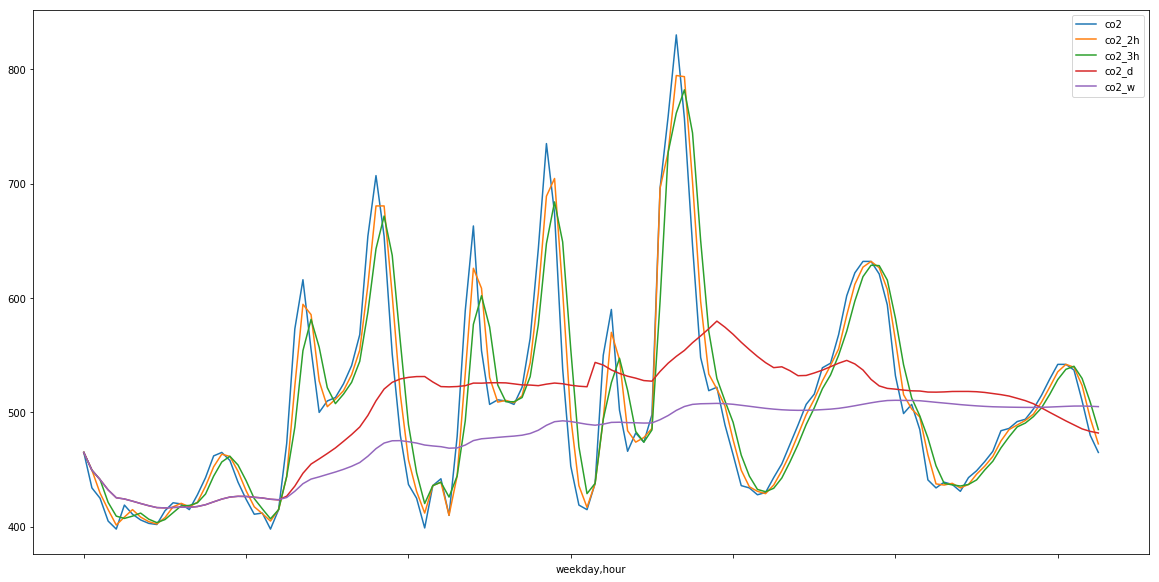

In [331]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Moyennes glissantes sur différentes fenêtres temporelles du Co2 dans auber")
ax.set_xlabel("Jour de la semaine et heure")
ax.set_ylabel("Quantité de co2 en ppm")
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = [OUT,OUT + '_2h',OUT + '_3h',OUT + '_d',OUT + '_w'], ax = ax)

In [332]:
data_2013['err_' + OUT + '_2h'] = data_2013[OUT] - data_2013[OUT + '_2h']
data_2013['err_' + OUT + '_3h'] = data_2013[OUT] - data_2013[OUT + '_3h']
data_2013['err_' + OUT + '_d'] = data_2013[OUT] - data_2013[OUT + '_d']
data_2013['err_' + OUT + '_w'] = data_2013[OUT] - data_2013[OUT + '_w']

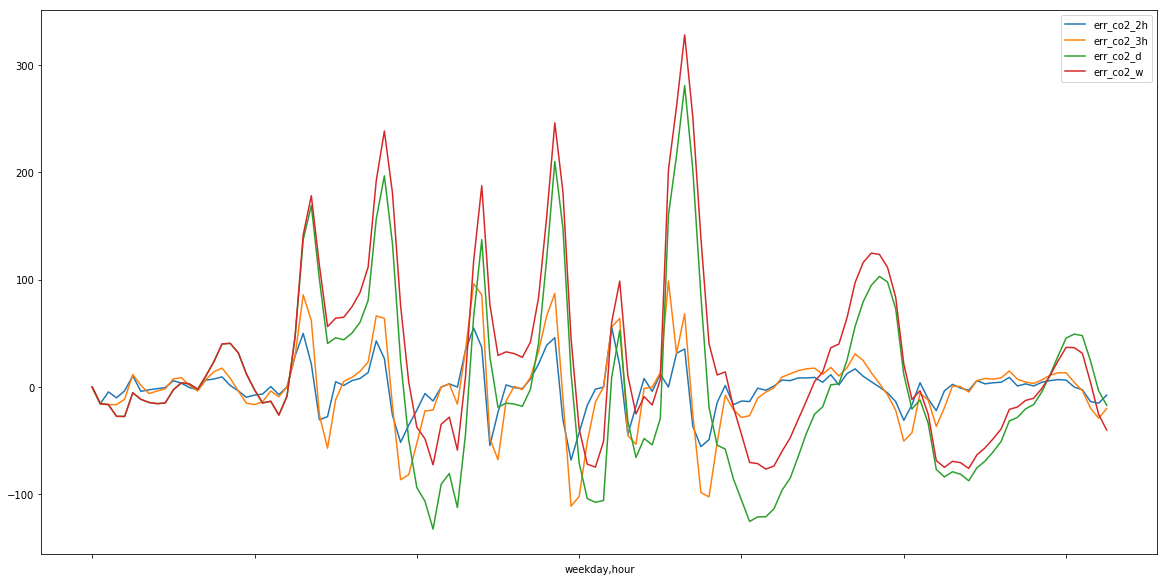

In [333]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Erreur entre moyenne glissante et la courbe originale du co2")
ax.set_xlabel("Jour de la semaine et heure")
ax.set_ylabel("Quantité de co2 en ppm")
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = ['err_' +OUT + '_2h','err_' +OUT + '_3h','err_' +OUT + '_d','err_' +OUT + '_w'], ax = ax)

In [334]:
data = data.set_index(data['datetime'])
data = data.sort_index()
data[OUT +'_2h'] = data[OUT].rolling(window = '2H',min_periods = 1).mean()
data[OUT +'_3h'] = data[OUT].rolling(window = '3H',min_periods = 1).mean()
data[OUT +'_d'] = data[OUT].rolling(window = '24H',min_periods = 1).mean()
data[OUT +'_w'] = data[OUT].rolling(window = '7d',min_periods = 1).mean()

###### Building sliding window

In [335]:
delay = 24
window = 24
source = OUT
lag =  1
for idx in range(lag,window):
    data[source + '_'  + str(idx)] = data[source]
    data[source + '_' + str(idx)] = data[source + '_' + str(idx)].shift(idx)
    
# removing the nans at the start
data = data.iloc[window:,:]

###### Pairplot

In [336]:
data_corr = data[['frequentation','year','month','day','hour','weekday','week','precipitation','temp_min','temp_max',OUT,OUT + '_3h',OUT + '_d',OUT + '_w','celebration','holiday']]

In [337]:
data_corr.columns

Index([u'frequentation', u'year', u'month', u'day', u'hour', u'weekday',
       u'week', u'precipitation', u'temp_min', u'temp_max', u'co2', u'co2_3h',
       u'co2_d', u'co2_w', u'celebration', u'holiday'],
      dtype='object')

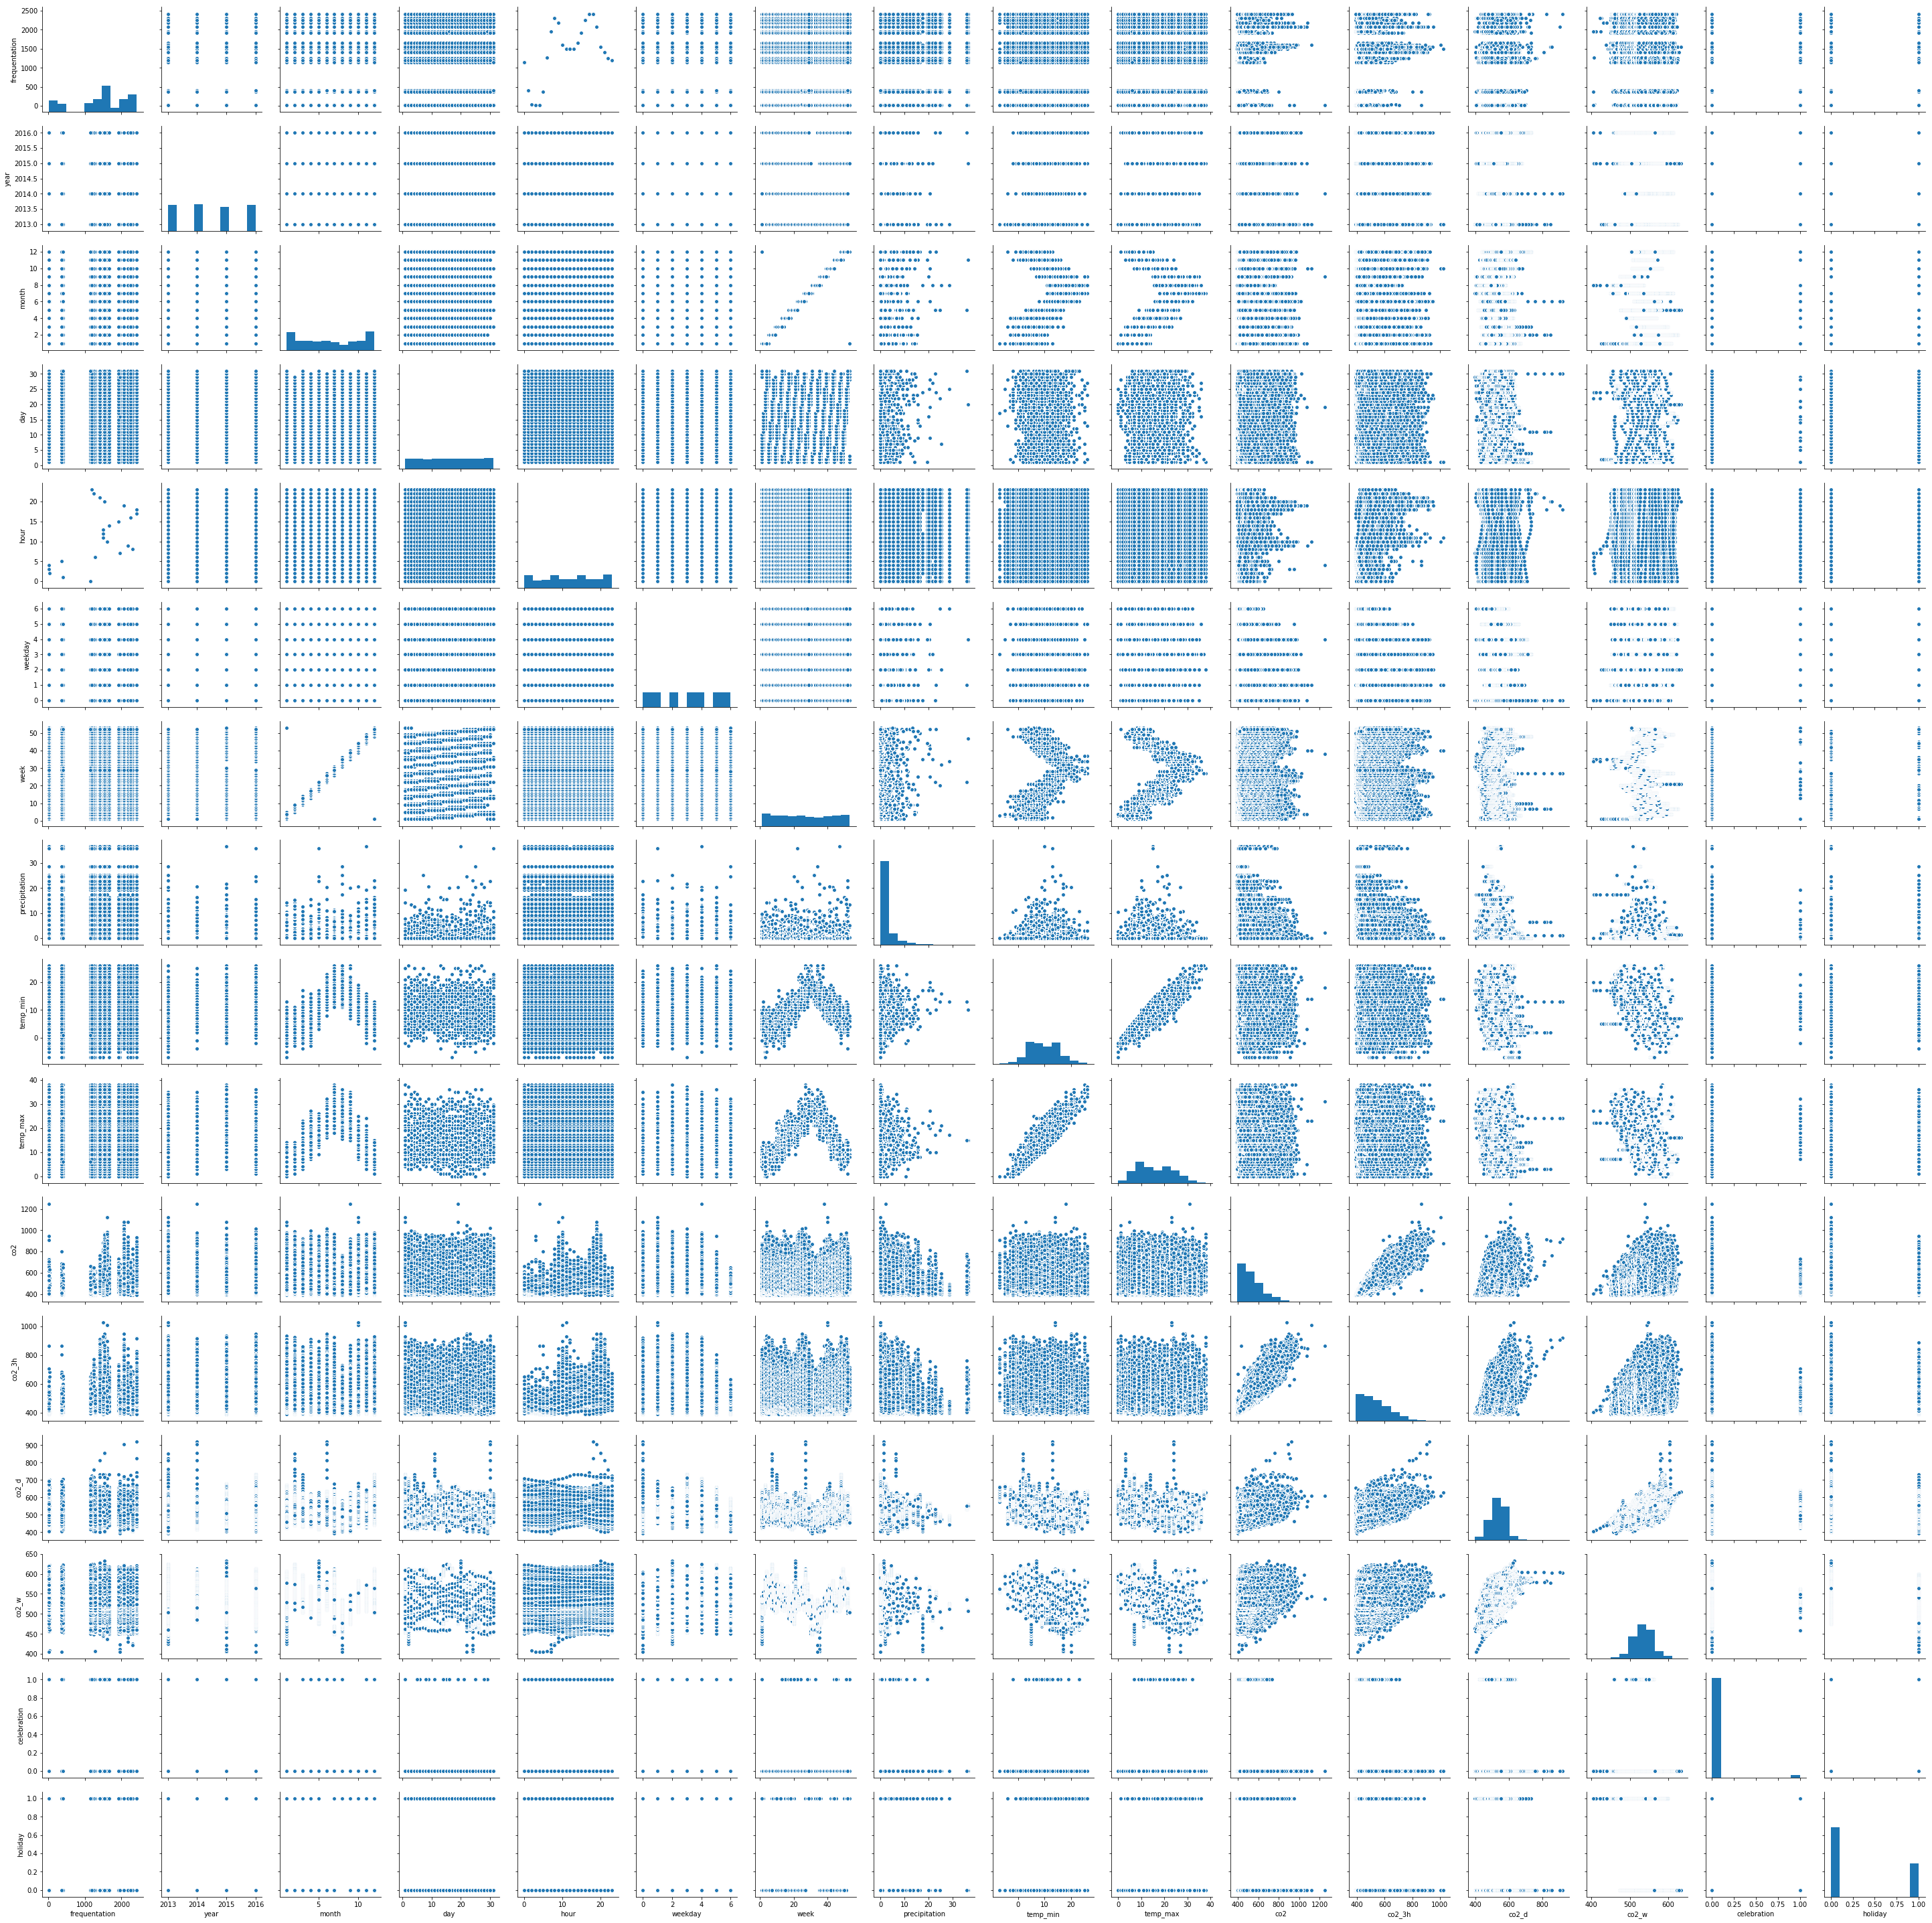

In [338]:
sns.pairplot(data_corr)

###### Correlations

In [339]:
corr = data_corr.corr()

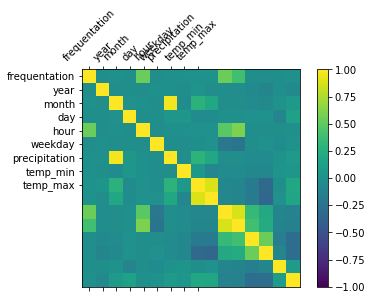

In [340]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

names = ['frequentation', 'year', 'month','day', 'hour', 'weekday', 'precipitation', 'temp_min','temp_max',OUT + '_d',OUT + '_w',OUT,'celebration','holiday']
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
plt.show()

## Feature engineering

In [341]:
data[OUT + '_log'] = data[OUT].apply(lambda x:np.log(x))
data[OUT + '_2h_log'] = data[OUT +'_2h'].apply(lambda x:np.log(x))
data[OUT + '_3h_log'] = data[OUT +'_3h'].apply(lambda x:np.log(x))
data[OUT + '_d_log'] = data[OUT +'_d'].apply(lambda x:np.log(x))
data[OUT + '_w_log'] = data[OUT +'_w'].apply(lambda x:np.log(x))
data['precipitation_log'] = data['precipitation'].apply(lambda x:np.log(x+0.001))

for i in range(lag,window):
    data['co2_log'] = data[source + '_' + str(i)].apply(lambda x:np.log(x))

#### Normalization

In [342]:
from sklearn.preprocessing import StandardScaler
scalers = {}
features_to_scale = [OUT +'_log','frequentation',OUT +'_2h_log',OUT +'_3h_log',OUT +'_d_log',OUT +'_w_log',
                     'precipitation_log','temp_min','temp_max','a','b',
                     '1','11','14','3','4','7', '8','9'] + [source + '_' + str(i) for i in range(lag,window)]


for feature in features_to_scale:
    scalers['feature'] = StandardScaler()
    scalers['feature'].fit_transform(data[feature].reshape(-1, 1))


/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


## Modelization

In [343]:


features = ['year','month','day','hour', 'weekday', 'precipitation','temp_min','temp_max','celebration','holiday']
if USE_FREQ:
    features += ['frequentation']
else:
    features += ['a','b','1','11','14','3','4','7', '8','9']

if USE_SLIDING_WINDOW:
    features += [source +'_' + str(i) for i in range(lag,window)]

In [344]:
X = data[features].values
Y = data['co2'].values.reshape(-1,1)
X_index = data['datetime']

In [345]:
data[features].columns

Index([u'year', u'month', u'day', u'hour', u'weekday', u'precipitation',
       u'temp_min', u'temp_max', u'celebration', u'holiday', u'a', u'b', u'1',
       u'11', u'14', u'3', u'4', u'7', u'8', u'9'],
      dtype='object')

In [346]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble

In [347]:
cv_ratio = 0.8

In [348]:
X_train, X_test, Y_train, Y_test, index_train, index_test, out_train,out_test = train_test_split(X,Y, X_index, out, random_state = SEED)

###### Baseline

In [349]:
from sklearn.metrics import r2_score

Simply use the mean of co2 as average

In [350]:
mean = np.average(Y_train)

In [351]:
Y_baseline_1 = np.full(Y_test.shape,mean)

In [352]:
baseline_1 = r2_score(Y_test,Y_baseline_1)

In [353]:
print(baseline_1)

-4.545944624445575e-05


#### Ridge Regression

In [354]:
clf = linear_model.Lasso(alpha = 0.1)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.4340042564020276

In [355]:
for idx in range(len(features)):
    print(features[idx],clf.coef_[idx])

('year', -1.3099417887409306)
('month', 0.19837987853381253)
('day', 0.17382672189793635)
('hour', 3.590292638482495)
('weekday', -10.930017264952044)
('precipitation', -0.9868346476944659)
('temp_min', -0.3161228094939809)
('temp_max', -0.7948062920346223)
('celebration', -52.26037312683596)
('holiday', -22.02692281039031)
('a', -0.1934431125268527)
('b', 0.0)
('1', 0.0)
('11', 0.0)
('14', 0.0)
('3', 0.06735688591883428)
('4', 0.0)
('7', -0.5872632361303475)
('8', -0.08276644153245831)
('9', 0.7400342736045574)


#### ElasticNet Regression

In [356]:
clf = linear_model.ElasticNet(alpha = 0.1)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.43148617947613166

In [357]:
coeff = []
for idx in range(len(features)):
    print(features[idx],clf.coef_[idx])
    coeff += [[features[idx],clf.coef_[idx]]]

print(sorted(coeff, key = lambda x: abs(x[1])))

('year', -1.2636943291621086)
('month', 0.14588903120008612)
('day', 0.21255846531394626)
('hour', 3.5781269328544196)
('weekday', -10.749417778907057)
('precipitation', -1.0875492181597721)
('temp_min', -0.22904694272186316)
('temp_max', -0.8935049354106345)
('celebration', -19.400651618735374)
('holiday', -19.087375133393106)
('a', -0.19898832808475517)
('b', 0.0)
('1', 0.0)
('11', 0.0)
('14', 0.0)
('3', 0.06717855953861222)
('4', 0.0)
('7', -0.5913341428437505)
('8', -0.07909838163680405)
('9', 0.7423390155087134)
[['b', 0.0], ['1', 0.0], ['11', 0.0], ['14', 0.0], ['4', 0.0], ['3', 0.06717855953861222], ['8', -0.07909838163680405], ['month', 0.14588903120008612], ['a', -0.19898832808475517], ['day', 0.21255846531394626], ['temp_min', -0.22904694272186316], ['7', -0.5913341428437505], ['9', 0.7423390155087134], ['temp_max', -0.8935049354106345], ['precipitation', -1.0875492181597721], ['year', -1.2636943291621086], ['hour', 3.5781269328544196], ['weekday', -10.749417778907057], ['hol

#### Random Forest Regression

In [358]:
clf = ensemble.RandomForestRegressor(n_estimators = 100)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9111976843210082

In [359]:
for idx in range(len(features)):
    print(features[idx],clf.feature_importances_[idx])

('year', 0.015917266416784884)
('month', 0.030149377021325634)
('day', 0.028974211470292346)
('hour', 0.4567689989141156)
('weekday', 0.1525960587905337)
('precipitation', 0.019360234183790504)
('temp_min', 0.021321736477739685)
('temp_max', 0.02830621123053351)
('celebration', 0.024620986899197145)
('holiday', 0.0185643179616336)
('a', 0.020512759056876523)
('b', 0.0)
('1', 0.0)
('11', 0.0)
('14', 0.0)
('3', 0.1307939560918307)
('4', 0.0)
('7', 0.015128492236012241)
('8', 0.019198376334852087)
('9', 0.017787016914481802)


###### Modélisation 2

In [360]:
USE_FREQ = False
USE_SLIDING_WINDOW = False

features = ['year','month','day','hour', 'weekday', 'precipitation','temp_min','temp_max','celebration','holiday']
if USE_FREQ:
    features += ['frequentation']
else:
    features += ['a','3','7', '8','9']

if USE_SLIDING_WINDOW:
    features += [source +'_' + str(i) for i in range(lag,window)]

In [361]:
X = data[features].values
out = data[OUT]
if USE_ROLLING_MEAN:
    Y = data[OUT+'_2h'].values.reshape(-1,1)
else:
    Y = data[OUT].values.reshape(-1,1)
X_index = data['datetime']

In [362]:
cv_ratio = 0.8

In [363]:
X_train, X_test, Y_train, Y_test, index_train, index_test, out_train,out_test = train_test_split(X,Y, X_index, out, random_state = SEED)

In [364]:
clf = ensemble.RandomForestRegressor(n_estimators = 100)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.911219633849134

In [365]:
clf.score(X_test,out_test)

0.911219633849134

In [366]:
test = pd.DataFrame(X_test,columns = features)
test['pred'] = clf.predict(X_test)
test['true'] = Y_test

In [367]:
test.head()

,year,month,day,hour,weekday,precipitation,temp_min,temp_max,celebration,holiday,a,3,7,8,9,pred,true
0,2015.0,3.0,10.0,21.0,1.0,0.6,11.0,13.0,0.0,0.0,66.0,700.0,275.0,276.0,360.0,584.57,547.0
1,2015.0,2.0,24.0,0.0,1.0,1.2,6.0,10.0,0.0,1.0,61.0,576.0,225.0,223.0,285.0,460.39,446.0
2,2014.0,3.0,19.0,13.0,2.0,0.0,6.0,18.0,0.0,0.0,94.0,692.0,324.0,352.0,390.0,553.72,531.0
3,2014.0,11.0,10.0,3.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,398.96,396.0
4,2016.0,11.0,29.0,12.0,1.0,0.0,1.0,5.0,0.0,0.0,94.0,689.0,327.0,335.0,388.0,562.44,529.0


In [368]:
test['datetime'] = pd.to_datetime(test[['year','month','day','hour']])

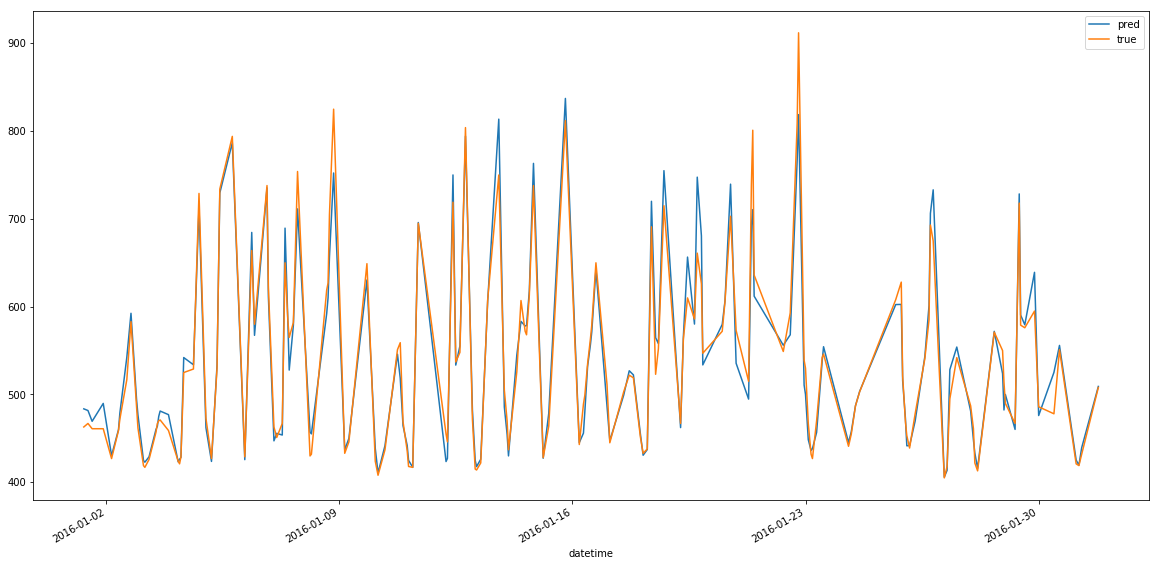

In [369]:
fig, ax = plt.subplots(figsize=(20,10))
index = (test['year'] == 2016) & (test['month'] == 1)
ax.set_title("Courbe prédite vs originale de la quantité de Co2 dans auber")
ax.set_xlabel("Data et heure")
ax.set_ylabel("Quantité de co2 en ppm")
test.loc[index,:].plot(x = ['datetime'], y=['pred','true'], ax = ax)

In [370]:
from sklearn.model_selection import GridSearchCV

###### Grid search random forest

In [371]:
clf = ensemble.RandomForestRegressor(n_jobs=4)

In [372]:
param_grid = {
    "n_estimators":[1000,5000],
    "min_samples_split":[2,3],
    "min_samples_leaf":[1,2]
}

In [373]:
gridcv = GridSearchCV(clf,param_grid)

In [374]:
gridcv.fit(X,Y)

/home/romain/.virtualenvs/python2.7/local/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/romain/.virtualenvs/python2.7/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1000, 5000], 'min_samples_split': [2, 3], 'min_samples_leaf': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [375]:
gridcv.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 5000}

param_grid = {
    "n_estimators":[100,200,300,400],
    "min_samples_split":[2,3],
    "min_samples_leaf":[1,2]
}
best : {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 400}

In [376]:
gridcv.best_score_

0.8258326974339528